# 지도학습 필수과제

In [1]:
# 데이터 분석을 위한 pandas 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 파일 불러와서 데이터프레임 크기 확인
df = pd.read_csv('housingdata.csv')
df.shape

(506, 14)

In [3]:
# 데이터 타입 확인
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

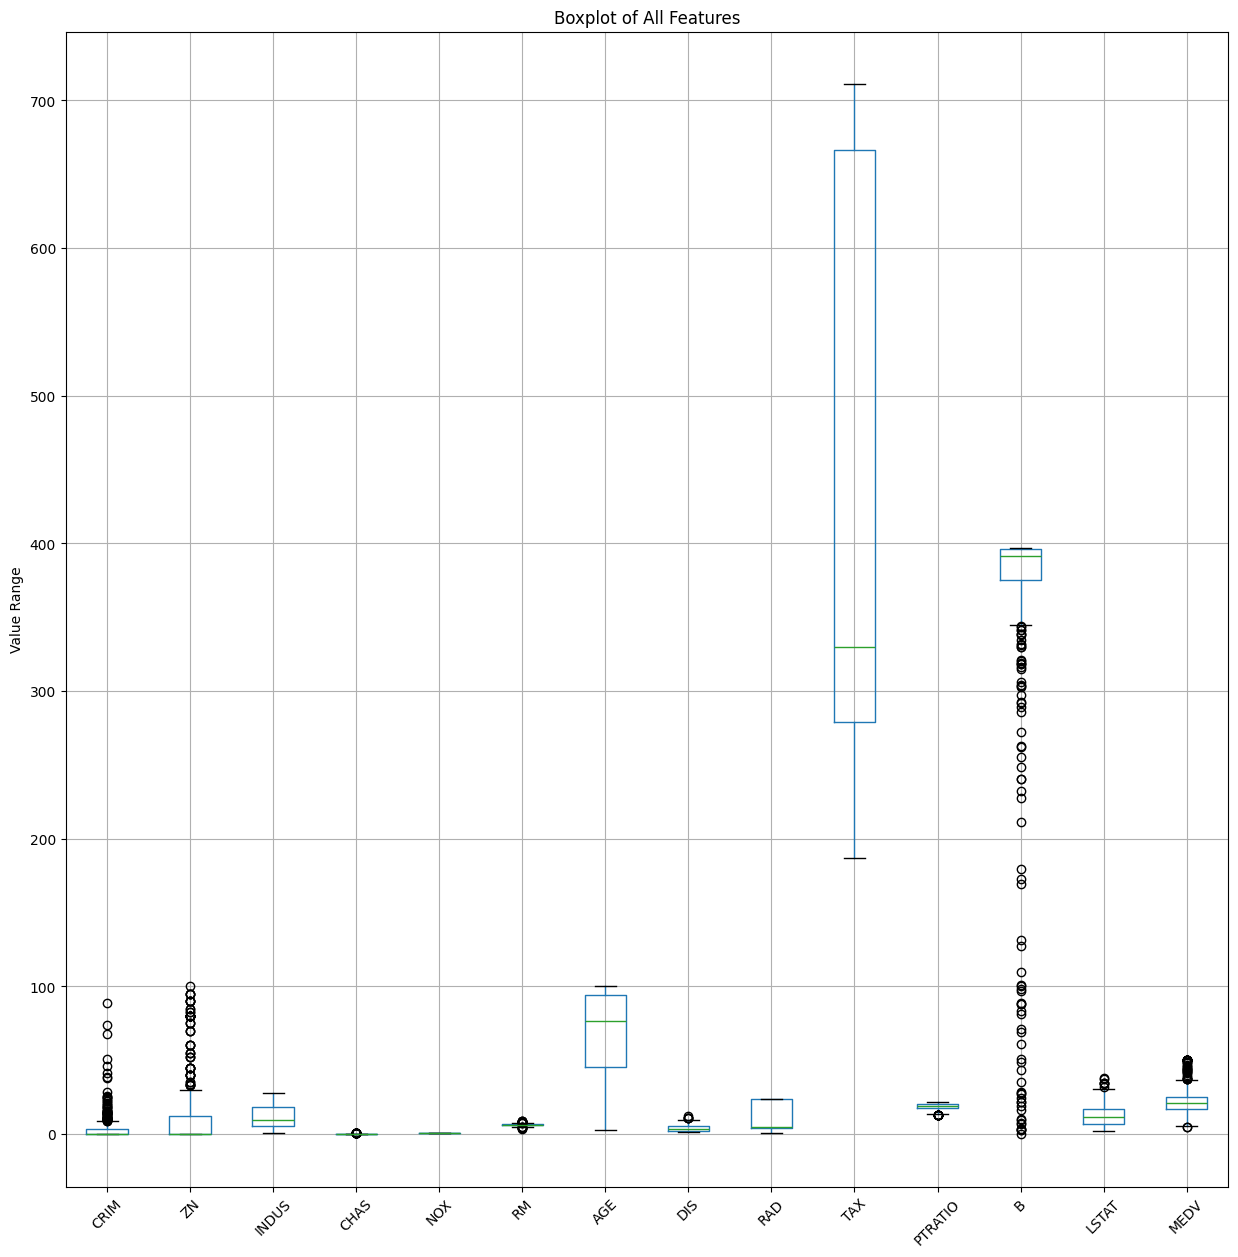

In [4]:
# 모든 데이터 boxplot 확인
plt.figure(figsize=(15, 15))  # 가로로 더 긴 그래프
df.boxplot()
plt.title("Boxplot of All Features")
plt.ylabel("Value Range")
plt.xticks(rotation=45)  # X축 라벨 회전
plt.show()

In [5]:
# 데이터의 통계값 확인
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# 데이터의 타입, 행 개수 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
# 총 결측치 확인
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

## 결측치, 이상치 처리

In [8]:
# CRIM - 통계량을 봤을 때 3사분위수가 평균과 비슷하므로 중간값 사용
# ZN, INDUS, AGE, LSTAT, CHAS- 평균값으로 사용
df['CRIM'] = df['CRIM'].interpolate()
df['ZN'] = df['ZN'].fillna(df['ZN'].mean())
df['INDUS'] = df['INDUS'].interpolate()
df['AGE'] = df['AGE'].fillna(df['AGE'].mean())
df['LSTAT'] = df['LSTAT'].interpolate()
df['CHAS'] = df['CHAS'].fillna(df['CHAS'].mean())

In [9]:
# 이상치 처리 - CRIM에 IQR 이용, upper bound 위의 데이터가 많으므로 완화해서 3 * IQR 사용
Q1_CRIM = df['CRIM'].quantile(0.25)
Q3_CRIM = df['CRIM'].quantile(0.75)
IQR_CRIM = Q3_CRIM - Q1_CRIM
upper_bound_CRIM = Q3_CRIM + 3 * IQR_CRIM
df = df[df['CRIM'] <= upper_bound_CRIM]

In [10]:
# 이상치 처리 - ZN도 IQR * 3 사용
Q1_ZN = df['ZN'].quantile(0.25)
Q3_ZN = df['ZN'].quantile(0.75)
IQR_ZN = Q3_ZN - Q1_ZN
upper_bound_ZN = Q3_ZN + 3 * IQR_ZN
df = df[df['ZN'] <= upper_bound_ZN]

In [11]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.271038,0.551965,-0.009191,0.600278,-0.157957,0.423528,-0.476472,0.876403,0.814952,0.340251,-0.501200,0.480060,-0.344217
ZN,-0.271038,1.000000,-0.442386,0.013000,-0.391360,0.269509,-0.401418,0.486183,-0.237259,-0.306871,-0.356937,0.159423,-0.337719,0.309981
INDUS,0.551965,-0.442386,1.000000,0.059176,0.713758,-0.329576,0.538347,-0.647089,0.527280,0.700784,0.286272,-0.336588,0.538427,-0.408192
CHAS,-0.009191,0.013000,0.059176,1.000000,0.079247,0.098762,0.081312,-0.096264,0.026168,-0.009248,-0.114243,0.042221,-0.042547,0.179974
NOX,0.600278,-0.391360,0.713758,0.079247,1.000000,-0.224309,0.647071,-0.734804,0.553059,0.638264,0.044644,-0.384068,0.520838,-0.336657
RM,-0.157957,0.269509,-0.329576,0.098762,-0.224309,1.000000,-0.133961,0.107635,-0.097587,-0.203545,-0.281597,0.070179,-0.559324,0.667996
AGE,0.423528,-0.401418,0.538347,0.081312,0.647071,-0.133961,1.000000,-0.665450,0.353131,0.438834,0.133988,-0.227761,0.521663,-0.275168
DIS,-0.476472,0.486183,-0.647089,-0.096264,-0.734804,0.107635,-0.665450,1.000000,-0.412925,-0.504754,-0.079525,0.273045,-0.408576,0.129858
RAD,0.876403,-0.237259,0.527280,0.026168,0.553059,-0.097587,0.353131,-0.412925,1.000000,0.896901,0.405726,-0.415584,0.364056,-0.262364
TAX,0.814952,-0.306871,0.700784,-0.009248,0.638264,-0.203545,0.438834,-0.504754,0.896901,1.000000,0.411145,-0.419890,0.450945,-0.373291


In [12]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.200000,4.0900,1,296,15.3,396.90,4.980,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.900000,4.9671,2,242,17.8,396.90,9.140,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.100000,4.9671,2,242,17.8,392.83,4.030,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.800000,6.0622,3,222,18.7,394.63,2.940,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.200000,6.0622,3,222,18.7,396.90,4.075,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.100000,2.4786,1,273,21.0,391.99,11.705,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.700000,2.2875,1,273,21.0,396.90,9.080,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.000000,2.1675,1,273,21.0,396.90,5.640,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.300000,2.3889,1,273,21.0,393.45,6.480,22.0


# Feature Engineering

### 인구 밀도 = ZN / DIS 생성해보았으나 ZN과 상관관계가 너무 높아 삭제
### 변수들 중 상관관계가 낮은 B, CHAS, CRIM 제거했을 때 테스트, 검증 결과값이 더 높아 제거
### RAD와 TAX의 상관관계가 0.88로 과적합 및 다중공선성 문제 제거 위해 하나를 선택해야 하는데, RAD와 MEDV 의 상관관계가 더 낮아 RAD 열 제거

In [13]:
# 전처리 및 모델, 평가 지표 불러오기
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer

In [14]:
# 각 결과값을 제거하기 위한 딕셔너리 생성
cv_dict = {}
mse_dict = {}
r2_dict = {}

In [15]:
# X 데이터 조절
X = df.drop(columns=['B','CHAS','CRIM', 'MEDV', 'RAD'], axis = 1)
y = df['MEDV']
# 훈련, 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 선형 회귀

In [16]:
# 검증 결과를 mse로 확인
model = LinearRegression()
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv_score_linear = cross_val_score(model, X_train, y_train, cv =5, scoring=mse_scorer)
print(-cv_score_linear)
print(-cv_score_linear.mean())
# 검증 결과의 평균을 딕셔너리에 저장
cv_dict['LinearRegression'] = float(-cv_score_linear.mean())

[24.33857291 26.26738326 20.26780919 32.5793649  30.08215361]
26.707056773651537


In [17]:
# 모델 훈련
model.fit(X_train, y_train)

LinearRegression()

In [18]:
# 예측값 생성
y_pred = model.predict(X_test)
# 오차 절댓값의 평균
mae_linear = mean_absolute_error(y_test, y_pred)
# 오차 제곱의 평균
mse_linear = mean_squared_error(y_test, y_pred)
# 각 모델의 mse를 딕셔너리에 저장
mse_dict['LinearRegression'] = mse_linear
# 데이터의 변동성을 설명하는 r2_score
r2_linear = r2_score(y_test, y_pred)
# 각 모델의 r2score 또한 딕셔너리에 저장
r2_dict['LinearRegression'] = r2_linear

In [19]:
# 각 평가지표 출력
print(f'mae : {mae_linear}')
print(f'mse : {mse_linear}')
print(f'r2 : {r2_linear}')

mae : 3.1120301467640643
mse : 20.023419325931126
r2 : 0.6544474458491598


## 다항 회귀

In [20]:
from sklearn.preprocessing import PolynomialFeatures

In [21]:
# 다항회귀 변수 생성
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [22]:
# 검증 결과를 mse로 확인
model = LinearRegression()
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv_score_poly = cross_val_score(model, X_train_poly, y_train_poly, cv =5, scoring=mse_scorer)
print(-cv_score_poly)
print(-cv_score_poly.mean())
cv_dict['PolynomialLinearRegression'] = float(-cv_score_poly.mean())

[14.76862675 16.78563082  8.7415921  21.33563489 14.15983286]
15.158263483854919


In [23]:
model.fit(X_train_poly, y_train_poly)
y_pred = model.predict(X_test_poly)
mae_poly = mean_absolute_error(y_test_poly, y_pred)
mse_poly = mean_squared_error(y_test_poly, y_pred)
mse_dict['PolynomialLinearRegression'] = mse_poly
r2_poly = r2_score(y_test_poly, y_pred)
r2_dict['PolynomialLinearRegression'] = r2_poly
print(f'mae : {mae_poly}')
print(f'mse : {mse_poly}')
print(f'r2 : {r2_poly}')

mae : 2.4235044649772197
mse : 15.42874628544916
r2 : 0.7337396475846754


## 릿지, 라쏘 하이퍼파라미터(alpha) 튜닝

In [24]:
# 리지, 라소 회귀와 하이파라미터 튜닝을 위해 GridSearch 불러오기
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

In [25]:
# 리지의 하이퍼파라미터 값인 알파 값들 중 최적값 찾기
ridge_params = {'alpha': [0.1, 0.3, 0.5, 0.7, 1.0, 10.0,100.0]}
# mse를 기준으로, 5개로 나누어 검증
ridge = GridSearchCV(Ridge(), ridge_params, cv= 5, scoring=mse_scorer)
ridge.fit(X_train, y_train)
best_model = ridge.best_estimator_
print(f"\nRidge Regression:")
print(f"Best Parameters: {ridge.best_params_}")


Ridge Regression:
Best Parameters: {'alpha': 10.0}


In [26]:
# 라쏘의 하이퍼파라미터 값인 알파 값들 중 최적값 찾기
lasso_params = {'alpha': [0.1, 0.3, 0.5, 0.7, 1.0, 10.0]}
# mse를 기준으로, 5개로 나누어 검증
lasso = GridSearchCV(Lasso(), lasso_params, cv= 5, scoring=mse_scorer)
lasso.fit(X_train, y_train)
best_model = lasso.best_estimator_
y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print(f"\nLasso Regression:")
print(f"Best Parameters: {lasso.best_params_}")


Lasso Regression:
Best Parameters: {'alpha': 0.1}


## 리지 회귀

In [27]:
# 방금 찾은 최적의 alpha값 10.0 사용
model = Ridge(alpha = 10.0)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv_score_ridge = cross_val_score(model, X_train, y_train, cv =5, scoring=mse_scorer)
print(-cv_score_ridge)
print(-cv_score_ridge.mean())
cv_dict['Ridge'] = float(-cv_score_ridge.mean())

[24.75993473 25.67024271 19.80513081 33.18462657 29.83593844]
26.651174651943762


In [28]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae_ridge= mean_absolute_error(y_test, y_pred)
mse_ridge = mean_squared_error(y_test, y_pred)
mse_dict['Ridge'] = mse_ridge
r2_ridge = r2_score(y_test, y_pred)
r2_dict['Ridge'] = r2_ridge
print(f'mae : {mae_ridge}')
print(f'mse : {mse_ridge}')
print(f'r2 : {r2_ridge}')

mae : 3.0826190982566666
mse : 19.391101331219417
r2 : 0.6653596229629459


## 라쏘 회귀

In [29]:
# 위에서 찾은 최적의 알파값 0.1 사용
model = Lasso(alpha = 0.1)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv_score_lasso = cross_val_score(model, X_train, y_train, cv =5, scoring=mse_scorer)
print(-cv_score_lasso)
print(-cv_score_lasso.mean())
cv_dict['Lasso'] = float(-cv_score_lasso.mean())

[24.28382874 25.97232901 19.50979916 33.22272297 29.82961141]
26.56365825876721


In [30]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae_lasso= mean_absolute_error(y_test, y_pred)
mse_lasso = mean_squared_error(y_test, y_pred)
mse_dict['Lasso'] = mse_lasso
r2_lasso = r2_score(y_test, y_pred)
r2_dict['Lasso'] = r2_lasso
print(f'mae : {mae_lasso}')
print(f'mse : {mse_lasso}')
print(f'r2 : {r2_lasso}')

mae : 3.1038885896158908
mse : 19.535161280584003
r2 : 0.662873519933115


## 의사결정나무

In [31]:
# 의사결정나무
from sklearn.tree import DecisionTreeRegressor

In [32]:
# 검증 결과를 mse로 확인
model = DecisionTreeRegressor(random_state=42)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv_score_tree = cross_val_score(model, X_train, y_train, cv =5, scoring=mse_scorer)
print(-cv_score_tree)
print(-cv_score_tree.mean())
cv_dict['DecisionTree'] = float(-cv_score_tree.mean())

[20.14434783 19.21811594  9.35623188 23.89028986 13.82588235]
17.28697357203751


In [33]:
model_tree = DecisionTreeRegressor(random_state=42)
model_tree.fit(X_train, y_train)
y_pred = model_tree.predict(X_test)
mae_tree = mean_absolute_error(y_test, y_pred)
mse_tree = mean_squared_error(y_test, y_pred)
mse_dict['DecisionTree'] = mse_tree
r2_tree = r2_score(y_test, y_pred)
r2_dict['DecisionTree'] = r2_tree

In [34]:
print(f'mae : {mae_tree}')
print(f'mse : {mse_tree}')
print(f'r2 : {r2_tree}')

mae : 3.190697674418604
mse : 24.1079069767442
r2 : 0.5839597275847674


# 1번 - 도전과제

In [35]:
# 앙상블 모델 호출
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

## RandomForest 하이퍼파라미터 튜닝

In [36]:
# RandomForest의 하이퍼파라미터 3가지 경우의수 검색
rf_params = {
        'n_estimators': [50, 100, 150, 200],
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 3, 5, 7, 10]
    }
rf = GridSearchCV(RandomForestRegressor(random_state= 42), rf_params, cv= 5, scoring= 'neg_mean_squared_error')
rf.fit(X_train, y_train)

best_model = rf.best_estimator_
best_params = rf.best_params_
cv_rmse = np.sqrt(-rf.best_score_)

# Test set evaluation
y_pred = best_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_mae = mean_absolute_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)

print(f"\nRandom Forest Regressor:")
print(f"Best Parameters: {best_params}")


Random Forest Regressor:
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


## 랜덤 포레스트

In [37]:
# 위에서 나온 최적의 하이퍼파라미터 값 사용
model = RandomForestRegressor(n_estimators=200, max_depth= 20, min_samples_split= 2,random_state=42)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv_score_randomforest = cross_val_score(model, X_train, y_train, cv =5, scoring=mse_scorer)
print(-cv_score_randomforest)
print(-cv_score_randomforest.mean())
cv_dict['RandomForest'] = float(-cv_score_randomforest.mean())

[ 9.70128762 13.93872746  5.2488985  11.82355743 10.97044988]
10.336584176263894


In [38]:
model_forest = RandomForestRegressor(n_estimators=200, max_depth= 20, min_samples_split= 2,random_state=42)
model_forest.fit(X_train, y_train)
y_pred = model_forest.predict(X_test)
mae_forest = mean_absolute_error(y_test, y_pred)
mse_forest = mean_squared_error(y_test, y_pred)
mse_dict['RandomForest'] = mse_forest
r2_forest = r2_score(y_test, y_pred)
r2_dict['RandomForest'] = r2_forest

In [39]:
print(f'mae : {mae_forest}')
print(f'mse : {mse_forest}')
print(f'r2 : {r2_forest}')

mae : 2.0521951688815077
mse : 11.469427812595608
r2 : 0.8020672687926743


## 배깅 기법 - 의사결정나무

In [40]:
# 검증 결과를 mse로 확인
model_bagging_tree = BaggingRegressor(n_estimators=100, random_state=42)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv_score_bagging_tree = cross_val_score(model_bagging_tree, X_train, y_train, cv =5, scoring=mse_scorer)
print(-cv_score_bagging_tree)
print(-cv_score_bagging_tree.mean())
cv_dict['BaggingTree'] = float(-cv_score_bagging_tree.mean())

[ 9.25433768 14.14418459  5.34163922 12.67904697 11.30501451]
10.544844595694798


In [41]:
model_bagging_tree = BaggingRegressor(n_estimators=100, random_state=42)
model_bagging_tree.fit(X_train, y_train)
y_pred = model_bagging_tree.predict(X_test)
mae_bagging_tree = mean_absolute_error(y_test, y_pred)
mse_bagging_tree = mean_squared_error(y_test, y_pred)
mse_dict['BaggingTree'] = mse_bagging_tree
r2_bagging_tree = r2_score(y_test, y_pred)
r2_dict['BaggingTree'] = r2_bagging_tree

In [42]:
print(f'mae : {mae_bagging_tree}')
print(f'mse : {mse_bagging_tree}')
print(f'r2 : {r2_bagging_tree}')

mae : 2.0760116279069774
mse : 11.534602453488386
r2 : 0.80094252265118


## 배깅 기법 - 선형 회귀

In [43]:
# 검증 결과를 mse로 확인
model = BaggingRegressor(estimator=LinearRegression(), n_estimators=100)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv_score_bagging_linear = cross_val_score(model, X_train, y_train, cv =5, scoring=mse_scorer)
print(-cv_score_bagging_linear)
print(-cv_score_bagging_linear.mean())
cv_dict['BaggingLinearRegression'] = float(-cv_score_bagging_linear.mean())

[24.2441002  26.15919201 20.39584576 32.37639677 29.97499202]
26.63010535171104


In [44]:
model_bagging_linear = BaggingRegressor(estimator=LinearRegression(), n_estimators=100)
model_bagging_linear.fit(X_train, y_train)
y_pred = model_bagging_linear.predict(X_test)
mae_bagging_linear = mean_absolute_error(y_test, y_pred)
mse_bagging_linear = mean_squared_error(y_test, y_pred)
mse_dict['BaggingLinearRegression'] = mse_bagging_linear
r2_bagging_linear = r2_score(y_test, y_pred)
r2_dict['BaggingLinearRegression'] = r2_bagging_linear

In [45]:
print(f'mae : {mae_bagging_linear}')
print(f'mse : {mse_bagging_linear}')
print(f'r2 : {r2_bagging_linear}')

mae : 3.104128731221109
mse : 20.009570005746497
r2 : 0.6546864493822304


## 배깅 기법 - 다항 회귀

In [46]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# 검증 결과를 mse로 확인

model = BaggingRegressor(estimator=LinearRegression(), n_estimators=100)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv_score_bagging_poly = cross_val_score(model, X_train_poly, y_train_poly, cv =5, scoring=mse_scorer)
print(-cv_score_bagging_linear)
print(-cv_score_bagging_linear.mean())
cv_dict['BaggingPolynomialLinearRegression'] = float(-cv_score_linear.mean())

[24.2441002  26.15919201 20.39584576 32.37639677 29.97499202]
26.63010535171104


In [47]:
model_bagging_poly = BaggingRegressor(estimator=LinearRegression(), n_estimators=100)
model_bagging_poly.fit(X_train_poly, y_train_poly)
y_pred = model_bagging_poly.predict(X_test_poly)
mae_bagging_poly = mean_absolute_error(y_test_poly, y_pred)
mse_bagging_poly = mean_squared_error(y_test_poly, y_pred)
mse_dict['BaggingPolynomialLinearRegression'] = mse_bagging_poly
r2_bagging_poly = r2_score(y_test_poly, y_pred)
r2_dict['BaggingPolynomialLinearRegression'] = r2_bagging_poly

In [48]:
print(f'mae : {mae_bagging_poly}')
print(f'mse : {mse_bagging_poly}')
print(f'r2 : {r2_bagging_poly}')

mae : 2.4697247946065004
mse : 16.15180942753823
r2 : 0.7212614433631998


## 부스팅 기법

In [49]:
# 검증 결과를 mse로 확인
boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv_score_boosting_tree = cross_val_score(boosting_model, X_train, y_train, cv =5, scoring=mse_scorer)
print(-cv_score_boosting_tree)
print(-cv_score_boosting_tree.mean())
cv_dict['Boosting'] = float(-cv_score_boosting_tree.mean())

[ 7.64050526 10.66078706  4.96233482  8.94912649  9.87225997]
8.417002720792038


In [50]:
model_boosting_tree = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_boosting_tree.fit(X_train, y_train)
y_pred = model_boosting_tree.predict(X_test)
mae_boosting_tree = mean_absolute_error(y_test, y_pred)
mse_boosting_tree = mean_squared_error(y_test, y_pred)
mse_dict['Boosting'] = mse_boosting_tree
r2_boosting_tree = r2_score(y_test, y_pred)
r2_dict['Boosting'] = r2_boosting_tree

In [51]:
print(f'mae : {mae_boosting_tree}')
print(f'mse : {mse_boosting_tree}')
print(f'r2 : {r2_boosting_tree}')

mae : 1.9991660189115672
mse : 10.942323180255563
r2 : 0.8111637347381265


In [52]:
# 각 모델의 cv, mse, r2 값을 저장해놓은 딕셔너리 출력
print(cv_dict)
print(mse_dict)
print(r2_dict)

{'LinearRegression': 26.707056773651537, 'PolynomialLinearRegression': 15.158263483854919, 'Ridge': 26.651174651943762, 'Lasso': 26.56365825876721, 'DecisionTree': 17.28697357203751, 'RandomForest': 10.336584176263894, 'BaggingTree': 10.544844595694798, 'BaggingLinearRegression': 26.63010535171104, 'BaggingPolynomialLinearRegression': 26.707056773651537, 'Boosting': 8.417002720792038}
{'LinearRegression': 20.023419325931126, 'PolynomialLinearRegression': 15.42874628544916, 'Ridge': 19.391101331219417, 'Lasso': 19.535161280584003, 'DecisionTree': 24.1079069767442, 'RandomForest': 11.469427812595608, 'BaggingTree': 11.534602453488386, 'BaggingLinearRegression': 20.009570005746497, 'BaggingPolynomialLinearRegression': 16.15180942753823, 'Boosting': 10.942323180255563}
{'LinearRegression': 0.6544474458491598, 'PolynomialLinearRegression': 0.7337396475846754, 'Ridge': 0.6653596229629459, 'Lasso': 0.662873519933115, 'DecisionTree': 0.5839597275847674, 'RandomForest': 0.8020672687926743, 'Bag

# 결과 시각화

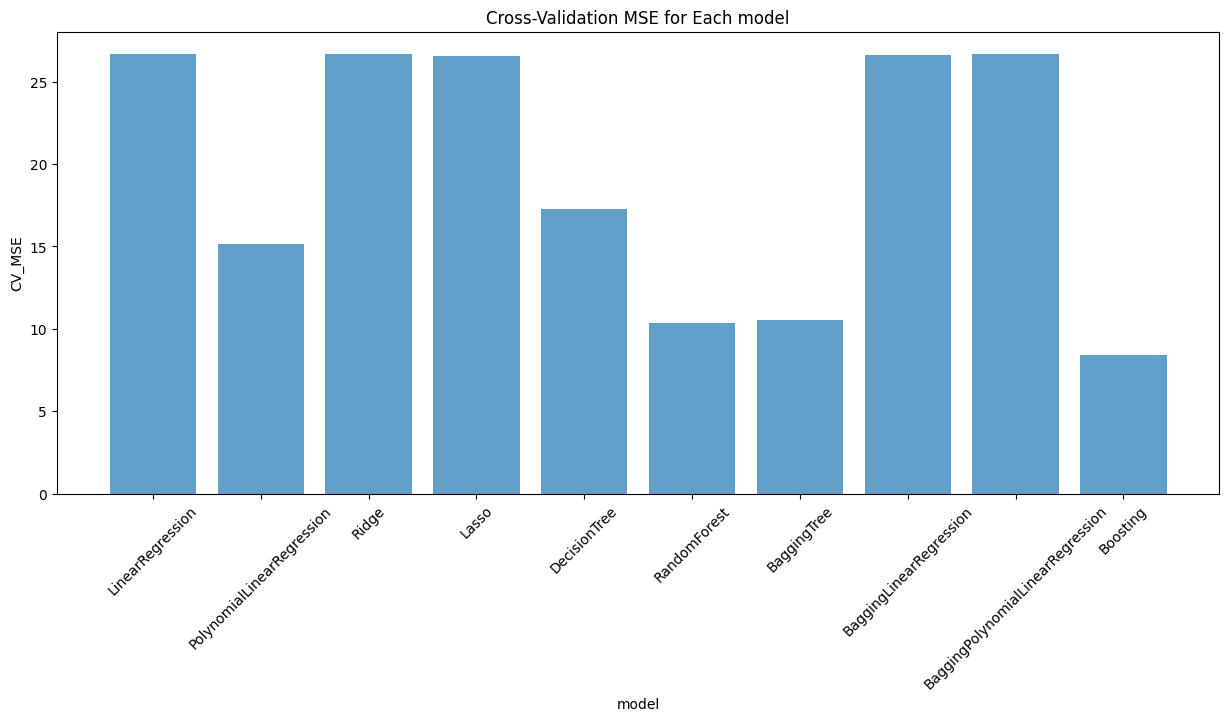

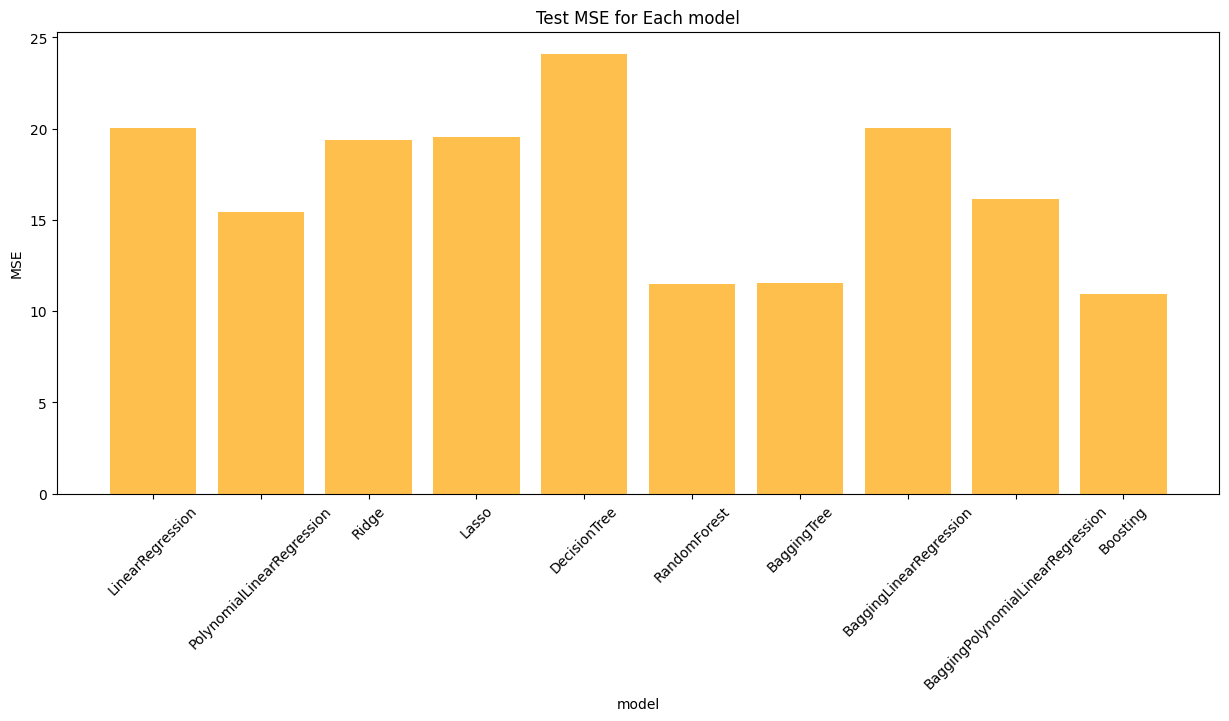

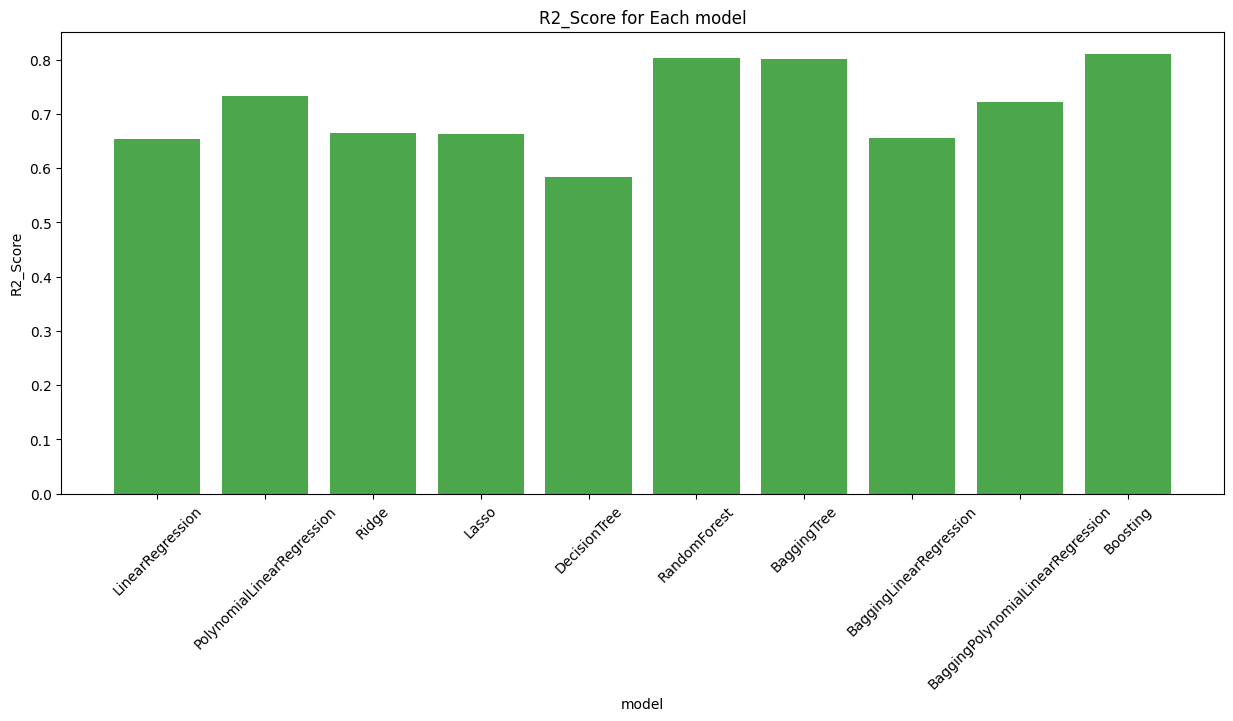

In [53]:
# CV MSE 그래프
plt.figure(figsize=(15, 6))
plt.bar(cv_dict.keys(), cv_dict.values(), alpha=0.7)
plt.title('Cross-Validation MSE for Each model')
plt.ylabel('CV_MSE')
plt.xlabel('model')
plt.xticks(rotation=45)
plt.show()

# MSE 그래프
plt.figure(figsize=(15, 6))
plt.bar(mse_dict.keys(), mse_dict.values(), alpha=0.7, color='orange')
plt.title('Test MSE for Each model')
plt.ylabel('MSE')
plt.xlabel('model')
plt.xticks(rotation=45)
plt.show()

# R² Score 그래프
plt.figure(figsize=(15, 6))
plt.bar(r2_dict.keys(), r2_dict.values(), alpha=0.7, color='green')
plt.title('R2_Score for Each model')
plt.ylabel('R2_Score')
plt.xlabel('model')
plt.xticks(rotation=45)
plt.show()